Problem Statement 1: Data Cleaning and Exploration
Objective: To identify and rectify inconsistencies, outliers, and missing data in a large,
real-world dataset.
Dataset: AB
NYC
2019.csv
_
_
Tasks:
1. Load and Inspect: Load the dataset into a Pandas DataFrame. Display the first few
rows, column data types (.info()), and summary statistics (.describe()).
2. Missing Values: Identify columns with missing values and count how many are missing
in each. For the reviews
_per
_
month column, fill the missing values with 0. For the
last
_
review column, drop the column entirely as it's not critical for this analysis.
3. Outlier Detection and Handling:
○
Focus on the price column. Visualize its distribution using a box plot to identify
outliers.
○
Calculate the first quartile (Q1), third quartile (Q3), and the Interquartile Range
○
○
(IQR).
Define outliers as any price below Q1−1.5×IQR or above Q3+1.5×IQR.
Create a new DataFrame that excludes these price outliers. From this point on,
use this cleaned DataFrame.
4. Data Consistency: The name and host
_
name columns might have inconsistencies
(e.g., leading/trailing spaces, inconsistent capitalization). Though we won't fix them all,
describe a strategy you would use to clean text data in a real-world scenario.

Que1.
1.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/AB_NYC_2019.csv')

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Que1.
2.

In [9]:
df.isna().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [10]:
df.dropna(subset=['name'], inplace=True)

In [11]:
df.isna().sum()

,0
id,0
name,0
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [14]:
df['reviews_per_month'].fillna(0, inplace=True)

/tmp/ipython-input-1792330394.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


Que1.
3.

In [19]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame excluding outliers
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)].copy()

print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

Original DataFrame shape: (48879, 15)
Cleaned DataFrame shape: (45908, 15)


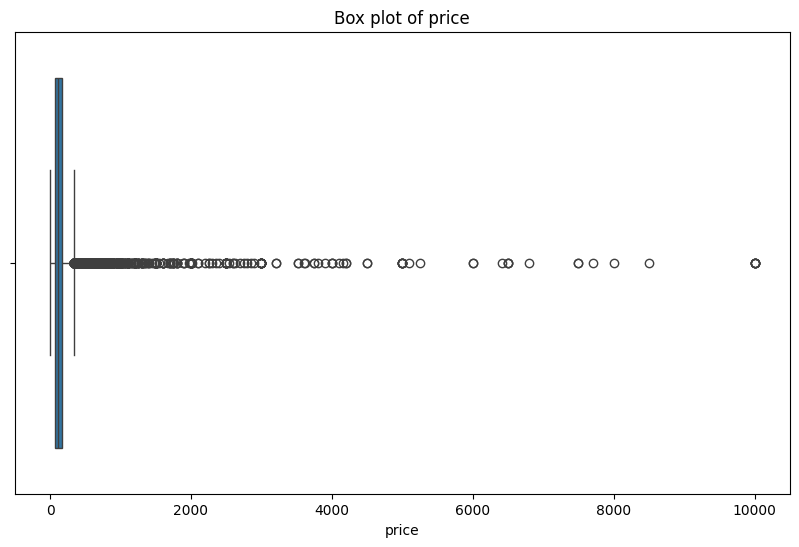

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box plot of price')
plt.show()

Que1.
4.

**Problem Statement 2: Central Tendency and Visualization**

Objective: To calculate and visualize measures of central tendency for key variables in the
dataset.

Tasks:
1. Calculate Central Tendency: For the price and number
of
reviews columns, calculate
_
_
the mean, median, and mode.
2. Analyze and Interpret:
○
For the price column, which measure (mean or median) do you think is a better
representation of the typical price? Why?
○
Print a sentence describing your findings (e.g.,
"The average price is X, while the
median price is Y.
").
3. Visualization:
○
Using matplotlib or seaborn, create a histogram for the price column to visualize
its distribution.
○
Create box plots to compare the price distribution across different room
_
type
categories. Does the typical price seem to differ significantly between 'Private
room'
,
'Entire home/apt'
, and 'Shared room'?

que2.
1.1

In [22]:
price_mean = df_cleaned['price'].mean()
price_median = df_cleaned['price'].median()
price_mode = df_cleaned['price'].mode()[0]

reviews_mean = df_cleaned['number_of_reviews'].mean()
reviews_median = df_cleaned['number_of_reviews'].median()
reviews_mode = df_cleaned['number_of_reviews'].mode()[0]

print(f"Price - Mean: {price_mean:.2f}, Median: {price_median:.2f}, Mode: {price_mode}")
print(f"Number of Reviews - Mean: {reviews_mean:.2f}, Median: {reviews_median:.2f}, Mode: {reviews_mode}")

Price - Mean: 119.97, Median: 100.00, Mode: 100
Number of Reviews - Mean: 23.95, Median: 5.00, Mode: 0


Que2.
1.2

In [24]:
print(f"The average price is {price_mean:.2f}, while the median price is {price_median:.2f}.")

The average price is 119.97, while the median price is 100.00.


Que2.
2.2

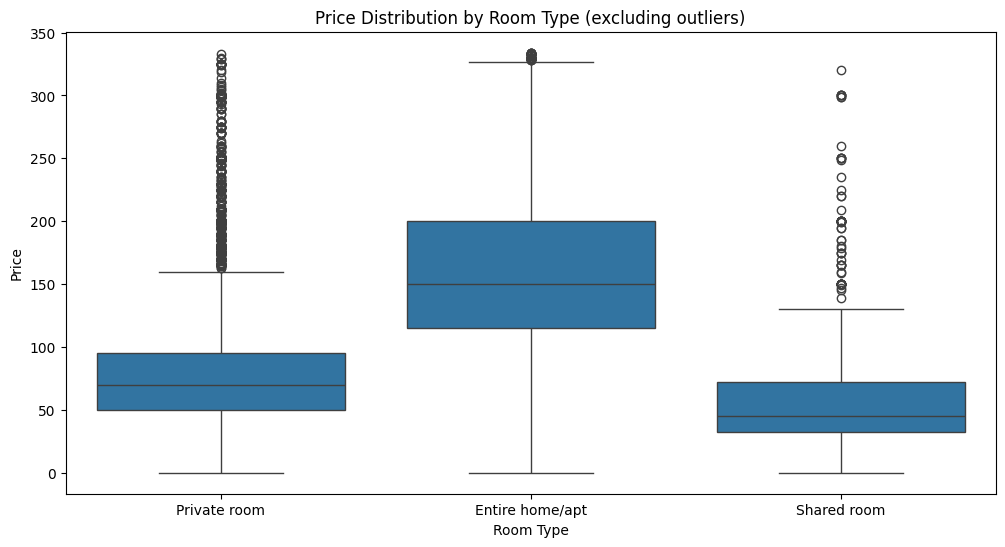

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df_cleaned)
plt.title('Price Distribution by Room Type (excluding outliers)')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

Que2.
2.1

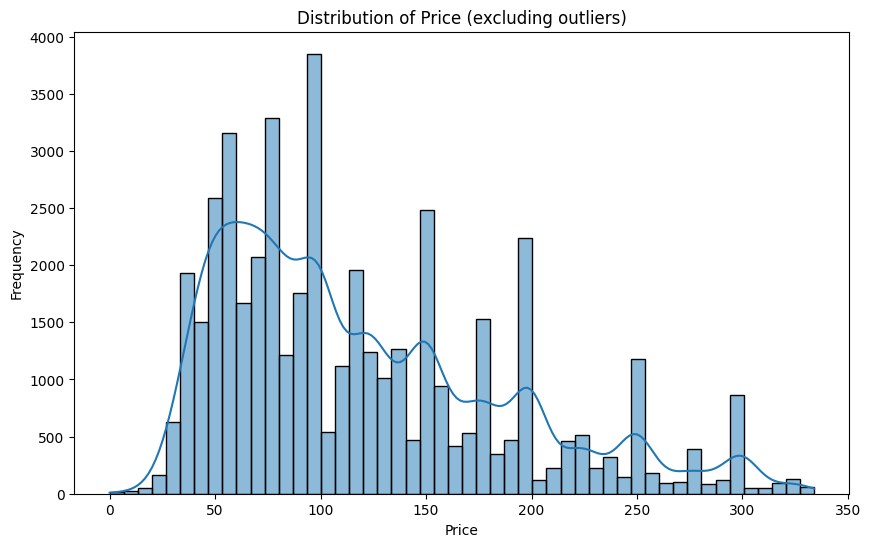

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.title('Distribution of Price (excluding outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Problem Statement 3: Sampling and the Central Limit Theorem (CLT)
Objective: To demonstrate the Central Limit Theorem by drawing samples from a non-normally
distributed population.
Dataset: The cleaned DataFrame from Problem 1.

Tasks:
1. Population Distribution:
○
Treat the calculated
host
_
_
listings
_
count column as your population.
○
Plot a histogram of this "population" data. Note its shape (it will likely be
heavily skewed). Calculate the population mean.
2. Create a Sampling Distribution:
○
Write a loop that performs the following 1000 times:
■ Draw a random sample of size n=50 from the
calculated
host
_
_
listings
_
count column.
■ Calculate the mean of this sample.
■ Store the sample mean in a list.
3. Visualize and Verify CLT:
○
Plot a histogram of the 1000 sample means you collected. This is your
sampling distribution.
○
What is the shape of this new distribution? Does it look approximately
normal?
○
○
Calculate the mean of your 1000 sample means. How close is it to the
original population mean?
Explain how your findings demonstrate the Central Limit Theorem.

Que3.
1

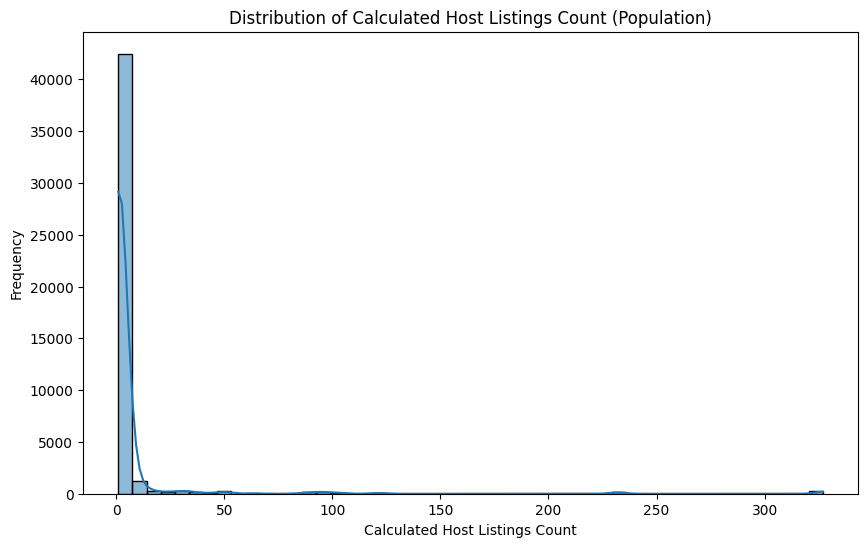

Population Mean of Calculated Host Listings Count: 6.64


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['calculated_host_listings_count'], bins=50, kde=True)
plt.title('Distribution of Calculated Host Listings Count (Population)')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Frequency')
plt.show()

population_mean = df_cleaned['calculated_host_listings_count'].mean()

print(f"Population Mean of Calculated Host Listings Count: {population_mean:.2f}")

Que3
1.1

In [35]:
import numpy as np

sample_means = []
sample_size = 50
num_samples = 1000

for _ in range(num_samples):
    sample = df_cleaned['calculated_host_listings_count'].sample(n=sample_size, replace=True)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

Que3.
2

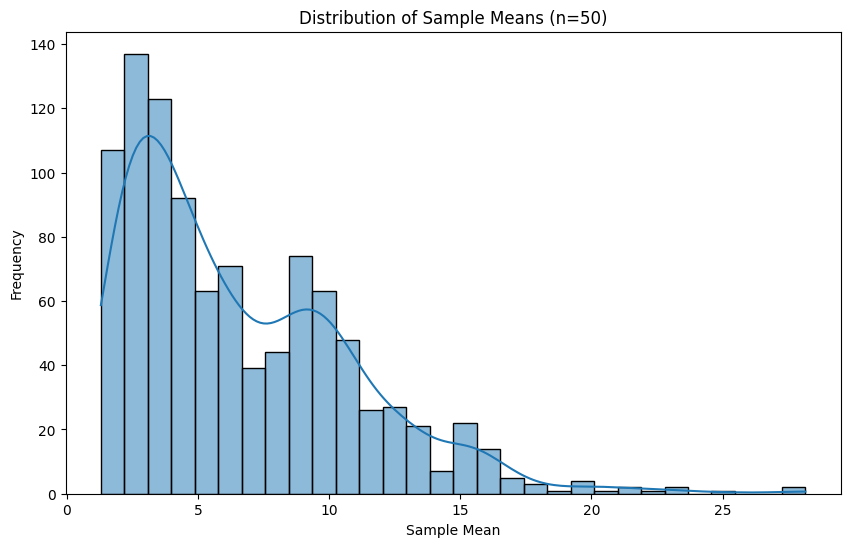

Mean of Sample Means: 6.61
Population Mean: 6.64


In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=30, kde=True)
plt.title('Distribution of Sample Means (n=50)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

mean_of_sample_means = np.mean(sample_means)

print(f"Mean of Sample Means: {mean_of_sample_means:.2f}")
print(f"Population Mean: {population_mean:.2f}")

Problem Statement 4: Hypothesis Testing
Objective: To use a t-test to determine if there is a statistically significant difference between two groups.
State the hypothesis
Null Hypothesis (H₀): The average price of Airbnb listings in Manhattan = The average price in Brooklyn.

Alternative Hypothesis (Hₐ): The average price of Airbnb listings in Manhattan ≠ The average price in Brooklyn.

Tasks:
1. State the Hypotheses:
○
Formulate the null hypothesis (H0 ), which assumes there is no difference in the
average price between the two boroughs.
○
Formulate the alternative hypothesis (Ha ), which assumes there is a difference.
2. Prepare the Data: Create two new Series or DataFrames: one containing the prices of
listings in 'Manhattan' and another with the prices for listings in 'Brooklyn'
.
3. Perform the Test:
○
Use the scipy.stats.ttest
_
ind() function to perform an independent two-sample
t-test on the Manhattan and Brooklyn price data.
4. Interpret the Results:
○
Set a significance level (alpha) of α=0.05.
○
Examine the p-value from your test result.
○
Based on the p-value, decide whether to reject or fail to reject the null
hypothesis. State your conclusion in the context of the problem (e.g.,
"There is/is
not a statistically significant difference in the average price...
").

In [36]:
manhattan_prices = df[df['neighbourhood_group'] == 'Manhattan']['price']
brooklyn_prices = df[df['neighbourhood_group'] == 'Brooklyn']['price']

print("Manhattan Mean Price:", manhattan_prices.mean())
print("Brooklyn Mean Price:", brooklyn_prices.mean())

Manhattan Mean Price: 196.87742471827082
Brooklyn Mean Price: 124.3957110160215


Perform the t-test

In [37]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(manhattan_prices, brooklyn_prices, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 30.464289388870817
P-value: 2.324498943438407e-201


In [39]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(manhattan_prices, brooklyn_prices, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 30.464289388870817
P-value: 2.324498943438407e-201


In [40]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference in the average price between Manhattan and Brooklyn listings.")
else:
    print("Fail to reject the null hypothesis.")
    print("Conclusion: There is NO statistically significant difference in the average price between Manhattan and Brooklyn listings.")

Reject the null hypothesis.
Conclusion: There is a statistically significant difference in the average price between Manhattan and Brooklyn listings.


Problem Statement 5: Advanced Pandas Operations

Objective: To practice advanced data manipulation, grouping, and performance optimization techniques in Pandas.

Tasks:
1. Data Selection and Performance:
○
Select all listings that are in the 'Bronx'
, have a price less than $100, and have
more than 10 reviews.
○
First, perform this selection using standard boolean indexing (e.g., df[(df['col1'] ==
val1) & ...]).
○
Second, perform the exact same selection using the df.query() method.
2. Hierarchical Indexing and Aggregation:
○
Use the groupby() method to group the data by both neighbourhood
_group and
room
_
type.
○
For each group, calculate the average price and the total number of reviews.
○
Display the resulting multi-index DataFrame. Which combination of borough and
room type is the most expensive on average?
3. Vectorized Operations (Applying a Function):
○
Write a function that categorizes the availability_
365 column into three text
labels: 'Low' (0 days),
'Medium' (1 to 180 days), and 'High' (more than 180 days).
○
Apply this function to the availability_
365 column to create a new column in your
DataFrame called availability_
category.
4. High-Performance Calculation with eval():
○
Imagine you want to calculate a "review score" defined as (reviews
_per
month *
_
number
of
_
_
reviews) / (minimum
_
nights + 1).
○
Calculate this score and create a new column named review
_
score using the
df.eval() method for efficient computation. Display the head of the DataFrame
with the new column.

In [41]:
selection = df[(df['neighbourhood_group'] == 'Bronx') &
                     (df['price'] < 100) &
                     (df['number_of_reviews'] > 10)]

print("Boolean Indexing Selection:")
selection.head()

Boolean Indexing Selection:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323
433,149777,Artsy 1 bedroom Apt. 20 min to 42nd Grand Cent...,716306,"Dee, Dre & Mama Shelley",Bronx,Woodlawn,40.89747,-73.86390,Entire home/apt,77,1,197,2.49,1,309
484,169306,Affordable & Cozy,806214,Vanessa,Bronx,University Heights,40.85811,-73.90675,Private room,37,4,117,1.21,1,232
557,206071,Yankee Stadium Oasis 2 stops to Manhattan!,12221,Lori,Bronx,Concourse Village,40.82802,-73.92039,Private room,50,3,258,2.70,2,276


In [42]:
bronx_selection_query = df.query("neighbourhood_group == 'Bronx' and price < 100 and number_of_reviews > 10")

print("Query Method Selection:")
bronx_selection_query.head()

Query Method Selection:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323
433,149777,Artsy 1 bedroom Apt. 20 min to 42nd Grand Cent...,716306,"Dee, Dre & Mama Shelley",Bronx,Woodlawn,40.89747,-73.86390,Entire home/apt,77,1,197,2.49,1,309
484,169306,Affordable & Cozy,806214,Vanessa,Bronx,University Heights,40.85811,-73.90675,Private room,37,4,117,1.21,1,232
557,206071,Yankee Stadium Oasis 2 stops to Manhattan!,12221,Lori,Bronx,Concourse Village,40.82802,-73.92039,Private room,50,3,258,2.70,2,276


In [43]:
grouped = df.groupby(['neighbourhood_group', 'room_type']).agg(
    avg_price=('price', 'mean'),
    total_reviews=('number_of_reviews', 'sum')
)
grouped

avg_price  total_reviews
neighbourhood_group room_type                                 
Bronx               Entire home/apt  127.506596          11627
                    Private room      66.788344          16312
                    Shared room       58.610169            432
Brooklyn            Entire home/apt  178.334693         267123
                    Private room      76.499852         213650
                    Shared room       50.527845           5793
Manhattan           Entire home/apt  249.236489         235112
                    Private room     116.794586         209150
                    Shared room       88.977083          10272
Queens              Entire home/apt  147.050573          60644
                    Private room      71.762456          93561
                    Shared room       69.020202           2745
Staten Island       Entire home/apt  173.846591           5857
                    Private room      62.292553           5670
                    Shared room       57.444444             14

In [44]:
most_expensive = grouped['avg_price'].idxmax()
print("\nMost expensive on average:", most_expensive)


Most expensive on average: ('Manhattan', 'Entire home/apt')


In [45]:
def categorize_availability(days):
    if days == 0:
        return 'Low'
    elif 1 <= days <= 180:
        return 'Medium'
    else:
        return 'High'


df['availability_category'] = df['availability_365'].apply(categorize_availability)

In [47]:
df['review_score'] = (df['reviews_per_month'] * df['number_of_reviews']) / (df['minimum_nights'] + 1)

print("\nReview Score Calculation:")
display(df[['reviews_per_month', 'number_of_reviews', 'minimum_nights', 'review_score']].head())


Review Score Calculation:


,reviews_per_month,number_of_reviews,minimum_nights,review_score
0,0.21,9,1,0.945000
1,0.38,45,1,8.550000
2,0.00,0,3,0.000000
3,4.64,270,1,626.400000
4,0.10,9,10,0.081818
